In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [20]:
ncd = pd.read_csv("data/EDA_files/ncd_screen.csv")

## Check Null OR Missing

In [21]:
ncd.isnull().any()

hospcode                False
pid                     False
seq                      True
ncd_screen_date_serv    False
servplace               False
smoke                    True
alcohol                  True
dmfamily                 True
htfamily                 True
weight                   True
height                  False
waist_cm                False
sbp_1                   False
dbp_1                   False
sbp_2                    True
dbp_2                    True
bslevel                  True
bstest                   True
screenplace             False
dtype: bool

In [10]:
ncd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   hospcode              6598 non-null   int64  
 1   pid                   6598 non-null   object 
 2   seq                   6549 non-null   object 
 3   ncd_screen_date_serv  6598 non-null   object 
 4   servplace             6598 non-null   int64  
 5   smoke                 6460 non-null   float64
 6   alcohol               6460 non-null   float64
 7   dmfamily              6597 non-null   float64
 8   htfamily              4971 non-null   float64
 9   weight                6597 non-null   float64
 10  height                6598 non-null   int64  
 11  waist_cm              6598 non-null   int64  
 12  sbp_1                 6598 non-null   int64  
 13  dbp_1                 6598 non-null   int64  
 14  sbp_2                 6543 non-null   float64
 15  dbp_2                

In [11]:
ncd.head()

,hospcode,pid,seq,ncd_screen_date_serv,servplace,smoke,alcohol,dmfamily,htfamily,weight,height,waist_cm,sbp_1,dbp_1,sbp_2,dbp_2,bslevel,bstest,screenplace
0,11023,008765,3499362,12/2/2013,1,1.0,1.0,9.0,1.0,55.0,149,88,113,68,110.0,89.0,86.0,3.0,11023
1,11024,017330,1841142,12/16/2015,1,1.0,1.0,2.0,2.0,46.0,154,76,120,60,120.0,60.0,130.0,3.0,11024
2,12418,049945,705117,7/9/2020,1,1.0,1.0,2.0,2.0,52.0,160,74,110,59,110.0,60.0,88.0,3.0,12418
3,12418,055877,693664,9/1/2020,1,1.0,1.0,2.0,2.0,50.0,165,74,100,65,100.0,60.0,85.0,3.0,12418
4,12418,053288,705105,7/9/2020,1,1.0,1.0,2.0,2.0,56.0,160,78,110,63,110.0,63.0,85.0,3.0,12418


### Drop Rows

In [22]:
# 6306 record
ncd.dropna(subset=["bslevel"], inplace =True)

### Drop Columns

In [13]:
ncd.drop(axis = 1, columns = ["bslevel"], inplace = True)

### แทนที่ NA OR NAN

In [23]:
ncd['smoke'].fillna(9, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_32704\1772892670.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ncd['smoke'].fillna(9, inplace=True)


### Replace

In [24]:
ncd["smoke"].replace(0,9,inplace = True)

C:\Users\user\AppData\Local\Temp\ipykernel_32704\1358115526.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ncd["smoke"].replace(0,9,inplace = True)


In [25]:
ncd.groupby("smoke", as_index=False).agg({'pid': pd.Series.nunique})

,smoke,pid
0,1.0,5183
1,2.0,42
2,3.0,20
3,4.0,169
4,9.0,677


<Axes: xlabel='bslevel'>

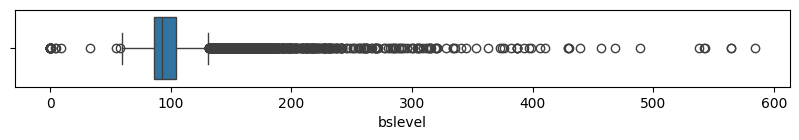

In [26]:
plt.figure(figsize=(10,1))
sns.boxplot(ncd, x="bslevel")